In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import hstack
import pickle as pk


# Tools for preprocessing input data
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import re



# Tools for creating ngrams and vectorizing input data
import gensim

from gensim.models import Word2Vec, Phrases

In [4]:
data_path = 'jigsaw-toxic-comment-classification-challenge'


train_data = pd.read_csv(data_path + '/train.csv/train.csv')
test_data = pd.read_csv(data_path + '/test.csv/test.csv')
sample_submission = pd.read_csv(data_path + '/sample_submission.csv/sample_submission.csv')

test_label = pd.read_csv(data_path + '/test_labels.csv/test_labels.csv')



In [5]:
train_data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [30]:
train_data['toxic'].value_counts()

0    144277
1     15294
Name: toxic, dtype: int64

In [4]:
sample_submission.head(2)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5


In [5]:
test_label.head(3)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1


# Data Exploration

In [6]:
train_data['comment_text']

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

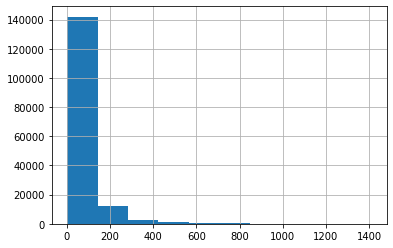

In [7]:
# hist of number of words 

train_data['comment_text'].map(lambda x : len(x.split())).hist()



In [8]:
train_data.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Trying out preprocessing  using the same pipeline as our project


#helper functions for lemmatizations
def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
              'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 

def lemmatize_sent(text): 
    wnl = WordNetLemmatizer()
    # Text input is string, returns lowercased strings.
    ls = list(wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) for word, tag in pos_tag(word_tokenize(text)))

    str = ''

    for i in  ls:
          str += i.lower() + ' '

    return str  

def clean_text(x):
    
    # remove html tags
    regex = re.compile('<.*?>')
    input =  re.sub(regex, '', x)

    #remove punctuations, numbers.
    input = re.sub('[!@#$%^&*()\n_:><?\-.{}|+-,;""``~`—]|[0-9]|/|=|\[\]|\[\[\]\]',' ',input)
    input = re.sub('[“’\']','',input)   
        
    #remove stopwords

    tmp_str  = ''
    for i in word_tokenize(input):

       if i  not in stop_dict and len(set(i)) > 2:
            tmp_str += i + ' '

    
    #lemmatize the text.
    

    return lemmatize_sent(tmp_str)




stop_dict = stopwords.words('english')

# tmp_sent  = "AAAAAA <html> <h1> run <i>running</i> ban banned dancing dance 1 2 3  4   5 5  5 !@#$%^&*(){{:><<< MMM<>?PLOKIU}} </h1> </html>"
tmp_sent  = ":::::And for the second time of asking, when"

clean_text(tmp_sent)

'and second time ask '

In [ ]:
# train_data['processed_comment_text'] = train_data['comment_text'].map(clean_text)


In [ ]:
# import pickle as pk

# pk.dump(train_data,open('processed_train_data','wb'))



In [11]:
train_data = pk.load(open('processed_train_data','rb'))

In [12]:
train_data['processed_comment_text'].head()

0    explanation why edits make username hardcore m...
1    daww match background colour seemingly stuck t...
2    hey man really try edit war it guy constantly ...
3    more cant make real suggestion improvement won...
4         you sir hero any chance remember page thats 
Name: processed_comment_text, dtype: object

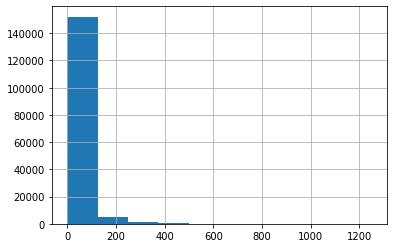

In [13]:
train_data['processed_comment_text'].map(lambda x : len(x.split())).hist()

In [14]:
# classes 
list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
Y = train_data[list_classes].values

In [36]:
#tfidf 
from sklearn.feature_extraction.text import TfidfVectorizer
#tfidf 
tfv = TfidfVectorizer(max_features = 10000,use_idf=1,smooth_idf=1,sublinear_tf=True)

words = tfv.fit(train_data['processed_comment_text'])
X_words = tfv.transform(train_data['processed_comment_text'])

In [14]:
# char_vectorizer = TfidfVectorizer(
#     sublinear_tf=True,
#     strip_accents='unicode',
#     analyzer='char',
#     stop_words='english',
#     ngram_range=(2, 6),
#     max_features=50000)
# chars = char_vectorizer.fit(train_data['processed_comment_text'])
# X_char = char_vectorizer.transform(train_data['processed_comment_text'])

c:\users\clive\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_extraction\text.py:497: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'stop_words' will not be used"


In [15]:
# X_char,X_words

(<159571x50000 sparse matrix of type '<class 'numpy.float64'>'
 	with 107292056 stored elements in Compressed Sparse Row format>,
 <159571x10000 sparse matrix of type '<class 'numpy.float64'>'
 	with 3984190 stored elements in Compressed Sparse Row format>)

In [37]:
# train_features = hstack([X_words, X_char])
X_words 

<159571x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 3984190 stored elements in Compressed Sparse Row format>

In [38]:
train_features = X_words

In [39]:
#train validation split
from sklearn.model_selection import train_test_split


trainx,testx,trainy,testy = train_test_split(train_features,Y,test_size = 0.3,random_state = 1001)

trainx.shape,testx.shape


((111699, 10000), (47872, 10000))

In [59]:
#model 
#include 
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier

import time

t1= time.time()


estimator = SGDClassifier(alpha = 0.00002,
                          n_jobs= -1,
                          random_state = 909,
                          loss = 'log',
                          penalty = 'l1',
                          learning_rate = 'invscaling',
                          eta0 = 500,
                          power_t = 0.5,
                          
                          shuffle = True,
                          early_stopping=True,
                         
                         )


clf  = OneVsRestClassifier(estimator,n_jobs= -1)

clf.fit(trainx,trainy)


print(f'training time = {time.time() - t1}')


training time = 1.5295398235321045


In [60]:
from sklearn.metrics import f1_score,hamming_loss,accuracy_score

pred_train = clf.predict(trainx)
pred_test = clf.predict(testx)

print('train loss:',hamming_loss(trainy,pred_train))
print('test loss:',hamming_loss(testy,pred_test))

print('train score:',f1_score(trainy,pred_train,average  = 'micro'))
print('test score:',f1_score(testy,pred_test,average = 'micro'))

train loss: 0.018384229044127523
test loss: 0.018824504233511587
train score: 0.7026426933751659
test score: 0.6931153867983427


## Training Time is under 2 Sec 